# Small World Graphs

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate, savefig

# Set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

In [3]:
# make a directory for figures
!mkdir -p figs

In [4]:
# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
#sns.palplot(colors)
sns.set_palette(colors)

## Regular ring lattice

To make a ring lattice, I'll start with a generator function that yields edges between each node and the next `halfk` neighbors.

In [5]:
def adjacent_edges(nodes, halfk):
    """Yields edges between each node and `halfk` neighbors.
    
    halfk: number of edges from each node
    """
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

We can test it with 3 nodes and `halfk=1`

In [6]:
nodes = range(3)
for edge in adjacent_edges(nodes, 1):
    print(edge)

(0, 1)
(1, 2)
(2, 0)


Now we use `adjacent_edges` to write `make_ring_lattice`

In [7]:
def make_ring_lattice(n, k):
    """Makes a ring lattice with `n` nodes and degree `k`.
    
    Note: this only works correctly if k is even.
    
    n: number of nodes
    k: degree of each node
    """
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

And we can test it out with `n=10` and `k=4`

In [8]:
lattice = make_ring_lattice(10, 4)

Saving figure to file figs/chap03-1


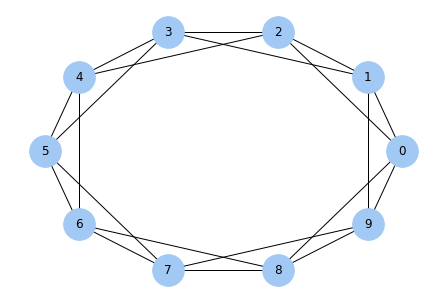

In [9]:
nx.draw_circular(lattice, 
                 node_color='C0', 
                 node_size=1000, 
                 with_labels=True)

savefig('figs/chap03-1')

**Exercise:** To see how this function fails when `k` is odd, run it again with `k=3` or `k=5`.

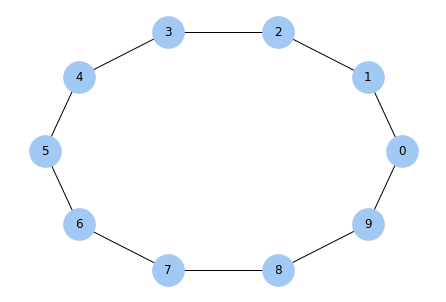

In [10]:
# Solution goes here
lattice = make_ring_lattice(10, 3)
nx.draw_circular(lattice, 
                 node_color='C0', 
                 node_size=1000, 
                 with_labels=True)

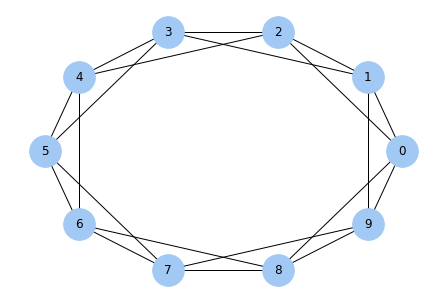

In [11]:
# Solution goes here
lattice = make_ring_lattice(10, 5)
nx.draw_circular(lattice, 
                 node_color='C0', 
                 node_size=1000, 
                 with_labels=True)

One of the exercises below asks you to explore regular graphs with odd values of `k`.

## WS graph

To make a WS graph, you start with a ring lattice and then rewire.

In [12]:
def make_ws_graph(n, k, p):
    """Makes a Watts-Strogatz graph.
    
    n: number of nodes
    k: degree of each node
    p: probability of rewiring an edge
    """
    ws = make_ring_lattice(n, k)
    rewire(ws, p)
    return ws

To do the rewiring, we'll need `flip`.

In [13]:
def flip(p):
    """Returns True with probability `p`."""
    return np.random.random() < p

Here's the function that does the rewiring

In [14]:
def rewire(G, p):
    """Rewires each edge with probability `p`.
    
    G: Graph
    p: float
    """
    # Fill this in
    nodes = set(G)
    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices)) 
            G.remove_edge(u, v)
            G.add_edge(u, new_v)
            
    

Here's an example with `p=0.2`

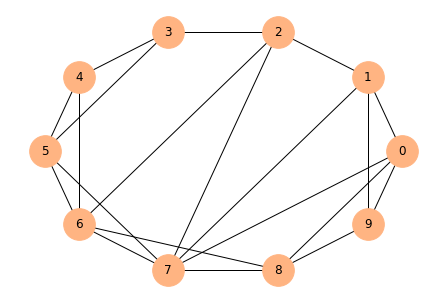

In [16]:
ws = make_ws_graph(10, 4, 0.2)
nx.draw_circular(ws, 
                 node_color='C1', 
                 node_size=1000, 
                 with_labels=True)

Just checking that we have the same number of edges we started with:

In [17]:
len(lattice.edges()), len(ws.edges())

(20, 20)

Now I'll generate a plot that shows WS graphs for a few values of `p`

Saving figure to file figs/chap03-2


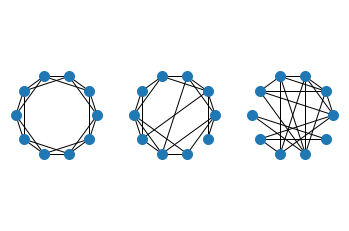

In [18]:
n = 10
k = 4
ns = 100

plt.subplot(1,3,1)
ws = make_ws_graph(n, k, 0)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.subplot(1,3,2)
ws = make_ws_graph(n, k, 0.2)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.subplot(1,3,3)
ws = make_ws_graph(n, k, 1.0)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

savefig('figs/chap03-2')

**Exercise:** What is the order of growth of `rewire`?

In [13]:
# Solution goes here

## Clustering

The following function computes the local clustering coefficient for a given node, `u`:

In [19]:
def node_clustering(G, u):
    """Computes local clustering coefficient for `u`.
    
    G: Graph
    u: node
    
    returns: float
    """
    neighbors = G[u]
    k = len(neighbors)
    if k < 2:
        return np.nan
        
    possible = k * (k-1) / 2
    exist = 0    
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist +=1
    return exist / possible

In [20]:
def all_pairs(nodes):
    """Generates all pairs of nodes."""
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

The network average clustering coefficient is just the mean of the local CCs.

In [21]:
def clustering_coefficient(G):
    """Average of the local clustering coefficients.
    
    G: Graph
    
    returns: float
    """
    
    cu = [node_clustering(G, node) for node in G] 
    return np.nanmean(cu)

In [90]:
# Solution goes here

In a ring lattice with `k=4`, the clustering coefficient for each node should be 0.5

In [22]:
lattice = make_ring_lattice(10, 4)
node_clustering(lattice, 1)

0.5

And the network average should be 0.5

In [23]:
clustering_coefficient(lattice)

0.5

Correct.

In [24]:
%timeit clustering_coefficient(lattice)

157 µs ± 5.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Exercise:** Write a version of `node_clustering` that replaces the `for` loop with a list comprehension.  Is it faster?

In [32]:
# Solution goes here

In [33]:
%timeit clustering_coefficient(lattice)

**Exercise:** What is the order of growth of `clustering_coefficient` in terms of `n`, `m`, and `k`?

In [21]:
# Solution goes here

## Path length

The following function computes path lengths between all pairs of nodes

In [25]:
def path_lengths(G):
    for u, v in all_pairs(G):
        length = nx.shortest_path_length(G,source=u,target=v)
        yield length


In [92]:
# Solution goes here

The characteristic path length is the mean path length for all pairs.

In [29]:
def characteristic_path_length(G):
    #return np.mean(list(path_lengths(G)))
    return nx.average_shortest_path_length(G)

On a complete graph, the average path length should be 1

In [30]:
complete = nx.complete_graph(10)
characteristic_path_length(complete)

1.0

On a ring lattice with `n=1000` and `k=10`, the mean is about 50

In [31]:
lattice = make_ring_lattice(1000, 10)
characteristic_path_length(lattice)

50.450450450450454

**Exercise:**  What is the mean path length in a ring lattice with `n=10` and `k=4`?

In [32]:
# Solution goes here
lattice = make_ring_lattice(10, 4)
characteristic_path_length(lattice)

1.6666666666666667

## The experiment

This function generates a WS graph with the given parameters and returns a pair of (mean path length, clustering coefficient):

In [33]:
def run_one_graph(n, k, p):
    """Makes a WS graph and computes its stats.
    
    n: number of nodes
    k: degree of each node
    p: probability of rewiring
    
    returns: tuple of (mean path length, clustering coefficient)
    """
    ws = make_ws_graph(n, k, p)    
    mpl = characteristic_path_length(ws)
    cc = clustering_coefficient(ws)
    print(mpl, cc)
    return mpl, cc

With `n=1000` and `k=10`, it takes a few seconds on my computer:

In [44]:
%time run_one_graph(1000, 10, 0.01)

Now we'll run it with a range of values for `p`.

In [34]:
ps = np.logspace(-4, 0, 9)
print(ps)

[1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00]


This function runs each value of `p` several times and returns a dictionary that maps from each `p` to a list of (mpl, cc) pairs.

In [35]:
def run_experiment(ps, n=1000, k=10, iters=10):
    """Computes stats for WS graphs with a range of `p`.
    
    ps: sequence of `p` to try
    n: number of nodes
    k: degree of each node
    iters: number of times to run for each `p`
    
    returns:
    """
    res = []
    for p in ps:
        print(p)
        t = [run_one_graph(n, k, p) for _ in range(iters)]
        means = np.array(t).mean(axis=0)
        print(means)
        res.append(means)
    return np.array(res)

Here are the raw results.  Warning: this takes a few minutes to run.

In [37]:
%time res = run_experiment(ps)

0.0001
27.553507507507508 0.6652863636363636
50.450450450450454 0.6666666666666665
50.450450450450454 0.6666666666666665
50.450450450450454 0.6666666666666665
42.4378978978979 0.6662065656565656
50.450450450450454 0.6666666666666665
47.294018018018015 0.6664232323232322
50.450450450450454 0.6666666666666665
49.92222022022022 0.6661343434343433
40.092314314314315 0.6662787878787878
[45.95522102  0.66636626]
0.00031622776601683794
32.691331331331334 0.6654974747474746
31.543933933933936 0.6661075757575756
35.031991991991994 0.6658186868686867
34.827653653653655 0.665890909090909
40.49121721721722 0.6662065656565656
28.49355955955956 0.6647540404040403
32.79443243243243 0.6652863636363636
26.325425425425426 0.6655484848484847
44.52292292292292 0.6656095959595958
50.450450450450454 0.6666666666666665
[35.71729189  0.66573864]
0.001
27.24018018018018 0.6653585858585856
25.31025225225225 0.6642671717171716
23.952014014014015 0.6644570707070707
26.61859259259259 0.664902525252525
27.656752752

In [38]:
res

array([[4.59552210e+01, 6.66366263e-01],
       [3.57172919e+01, 6.65738636e-01],
       [2.50399902e+01, 6.64482929e-01],
       [1.50940212e+01, 6.60314545e-01],
       [8.78224364e+00, 6.46623341e-01],
       [6.03594234e+00, 6.09948415e-01],
       [4.42499860e+00, 4.88750334e-01],
       [3.57608789e+00, 2.18265163e-01],
       [3.26709710e+00, 9.10089464e-03]])

Let's get the results into a form that's easy to plot.

In [39]:
L, C = np.transpose(res)

In [40]:
L

array([45.95522102, 35.71729189, 25.03999019, 15.09402122,  8.78224364,
        6.03594234,  4.4249986 ,  3.57608789,  3.2670971 ])

In [41]:
C

array([0.66636626, 0.66573864, 0.66448293, 0.66031455, 0.64662334,
       0.60994841, 0.48875033, 0.21826516, 0.00910089])

And normalize them so they both start at 1.0

In [42]:
L /= L[0]
C /= C[0]

Here's the plot that replicates Watts and Strogatz's Figure 2.

Saving figure to file figs/chap03-3


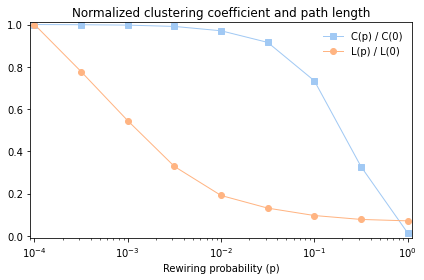

In [43]:
plt.plot(ps, C, 's-', linewidth=1, label='C(p) / C(0)')
plt.plot(ps, L, 'o-', linewidth=1, label='L(p) / L(0)')
decorate(xlabel='Rewiring probability (p)', xscale='log',
         title='Normalized clustering coefficient and path length',
         xlim=[0.00009, 1.1], ylim=[-0.01, 1.01])

savefig('figs/chap03-3')

## Breadth-first search

Now let's see how the shortest path algorithm works.  We'll start with BFS, which is the basis for Dijkstra's algorithm.

Here's our old friend, the ring lattice:

In [44]:
lattice = make_ring_lattice(10, 4)

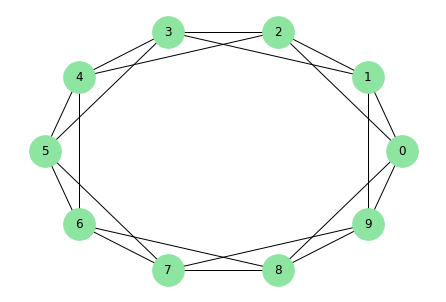

In [45]:
nx.draw_circular(lattice, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)

And here's my implementation of BFS using a deque.

In [46]:
from collections import deque

def reachable_nodes_bfs(G, start):
    """Finds reachable nodes by BFS.
    
    G: graph
    start: node to start at
    
    returns: set of reachable nodes
    """
    seen = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in seen:
            seen.add(node)
            queue.extend(G.neighbors(node))
    return seen

It works:

In [47]:
reachable_nodes_bfs(lattice, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Here's a version that's a little faster, but maybe less readable.

In [48]:
def reachable_nodes_bfs(G, start):
    """Finds reachable nodes by BFS.
    
    G: graph
    start: node to start at
    
    returns: set of reachable nodes
    """
    seen = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in seen:
            seen.add(node)
            neighbors = set(G[node]) - seen
            queue.extend(neighbors)
    return seen

It works, too.

In [49]:
reachable_nodes_bfs(lattice, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Dijkstra's algorithm

Now we're ready for Dijkstra's algorithm, at least for graphs where all the edges have the same weight/length.

In [50]:
def shortest_path_dijkstra(G, source):
    """Finds shortest paths from `source` to all other nodes.
    
    G: graph
    source: node to start at
    
    returns: make from node to path length
    """
    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.popleft()
        new_dist = dist[node] + 1

        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        
        queue.extend(neighbors)
    return dist

Again, we'll test it on a ring lattice.

In [51]:
lattice = make_ring_lattice(10, 4)

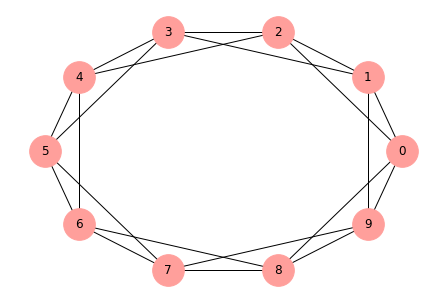

In [52]:
nx.draw_circular(lattice, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)

Here's my implementation:

In [53]:
d1 = shortest_path_dijkstra(lattice, 0)
d1

{0: 0, 8: 1, 1: 1, 2: 1, 9: 1, 6: 2, 7: 2, 3: 2, 4: 2, 5: 3}

And here's the result from NetworkX:

In [54]:
d2 = nx.shortest_path_length(lattice, 0)
d2

{0: 0, 8: 1, 1: 1, 2: 1, 9: 1, 3: 2, 4: 2, 6: 2, 7: 2, 5: 3}

They are the same:

In [55]:
d1 == d2

True

**Exercise:** In a ring lattice with `n=1000` and `k=10`, which node is farthest from 0 and how far is it?  Use `shortest_path_dijkstra` to check your answer.

Note: the maximum distance between two nodes is the **diameter** of the graph.

In [56]:
# Solution goes here
lattice = make_ring_lattice(1000, 10)

d1 = shortest_path_dijkstra(lattice, 0)
d1
# Nodes 496-504 are farthest, with path length 100.

{0: 0,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 995: 1,
 996: 1,
 997: 1,
 998: 1,
 999: 1,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 992: 2,
 993: 2,
 994: 2,
 990: 2,
 991: 2,
 11: 3,
 12: 3,
 13: 3,
 14: 3,
 15: 3,
 987: 3,
 988: 3,
 989: 3,
 985: 3,
 986: 3,
 16: 4,
 17: 4,
 18: 4,
 19: 4,
 20: 4,
 984: 4,
 982: 4,
 983: 4,
 980: 4,
 981: 4,
 21: 5,
 22: 5,
 23: 5,
 24: 5,
 25: 5,
 979: 5,
 977: 5,
 978: 5,
 976: 5,
 975: 5,
 26: 6,
 27: 6,
 28: 6,
 29: 6,
 30: 6,
 974: 6,
 972: 6,
 973: 6,
 971: 6,
 970: 6,
 31: 7,
 32: 7,
 33: 7,
 34: 7,
 35: 7,
 969: 7,
 968: 7,
 967: 7,
 966: 7,
 965: 7,
 36: 8,
 37: 8,
 38: 8,
 39: 8,
 40: 8,
 964: 8,
 963: 8,
 962: 8,
 961: 8,
 960: 8,
 41: 9,
 42: 9,
 43: 9,
 44: 9,
 45: 9,
 959: 9,
 958: 9,
 957: 9,
 956: 9,
 955: 9,
 46: 10,
 47: 10,
 48: 10,
 49: 10,
 50: 10,
 954: 10,
 953: 10,
 952: 10,
 951: 10,
 950: 10,
 51: 11,
 52: 11,
 53: 11,
 54: 11,
 55: 11,
 949: 11,
 948: 11,
 947: 11,
 946: 11,
 945: 11,
 56: 12,
 57: 12,
 58: 12,
 59: 12,
 60: 12,
 9

In [97]:
# Solution goes here

In [107]:
# Solution goes here

## Exercises

**Exercise:** In a ring lattice, every node has the same number of neighbors.  The number of neighbors is called the **degree** of the node, and a graph where all nodes have the same degree is called a **regular graph**.

All ring lattices are regular, but not all regular graphs are ring lattices.  In particular, if `k` is odd, we can't construct a ring lattice, but we might be able to construct a regular graph.

Write a function called `make_regular_graph` that takes `n` and `k` and returns a regular graph that contains `n` nodes, where every node has `k` neighbors.  If it's not possible to make a regular graph with the given values of `n` and `k`, the function should raise a `ValueError`.

In [70]:
# Here's `adjacent_edges` again for comparison:

def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

In [57]:
# Solution goes here
# I see that the exercise solutions gives the same answer as I do, and even uses the same 
# 'opposite_edges' function name, but I also came up with this independently.

def opposite_edges(n):
    for u in range(n):
        v = (u + n/2) % n
        yield u, v

def make_regular_graph(n,k):
    
    if (n*k) % 2 == 1:
        raise ValueError(f'Cannot make regular graph of {n} nodes with {k} neighbors each')
        
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    
    if k % 2 == 1:
        G.add_edges_from(opposite_edges(n))
            
    return G
    

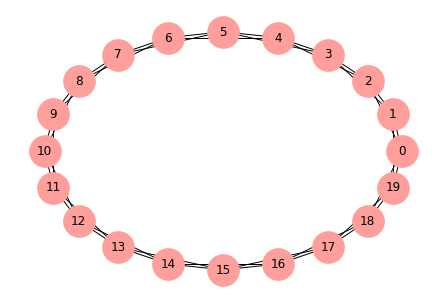

In [59]:
# Solution goes here
regular = make_regular_graph(20,4)
nx.draw_circular(regular, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)

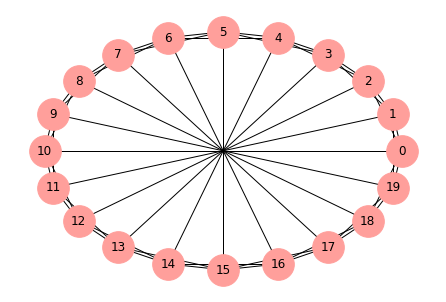

In [63]:
regular = make_regular_graph(20,5)
nx.draw_circular(regular, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)

In [64]:
# Solution goes here
reg = make_regular_graph(21,5)

ValueError: Cannot make regular graph of 21 nodes with 5 neighbors each

**Exercise:** My implementation of `reachable_nodes_bfs` is efficient in the sense that it is in $O(n + m)$, but it incurs a lot of overhead adding nodes to the queue and removing them.  NetworkX provides a simple, fast implementation of BFS, available from [the NetworkX repository on GitHub](https://github.com/networkx/networkx/blob/master/networkx/algorithms/components/connected.py).

Here is a version I modified to return a set of nodes:

In [69]:
def plain_bfs(G, start):
    """A fast BFS node generator"""
    seen = set()
    nextlevel = {start}
    while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        for v in thislevel:
            if v not in seen:
                seen.add(v)
                nextlevel.update(G[v])
    return seen

Compare this function to `reachable_nodes_bfs` and see which is faster.  Then see if you can modify this function to implement a faster version of `shortest_path_dijkstra`

In [71]:
def reachable_nodes_bfs(G, start):
    seen = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in seen:
            seen.add(node)
            queue.extend(G.neighbors(node))
    return seen

In [73]:
# Solution goes here
%time reachable_nodes_bfs(regular,0)
print(reachable_nodes_bfs(regular,0))
%time plain_bfs(regular,0)

# reachable_nodes_bfs is faster than plain_bfs

CPU times: user 82 µs, sys: 0 ns, total: 82 µs
Wall time: 89.4 µs
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.0, 11.0, 12.0, 13.0, 14.0, 15, 16, 17, 18, 19}
{0}
CPU times: user 401 µs, sys: 0 ns, total: 401 µs
Wall time: 410 µs


{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15,
 16,
 17,
 18,
 19}

In [82]:
def shortest_path_dijkstra_modified(G, source):
    """Finds shortest paths from `source` to all other nodes.
    
    G: graph
    source: node to start at
    
    returns: make from node to path length
    """
    seen = set()
    dist = {source: 0}
    nextlevel = {source}
    
    while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        for v in thislevel:
            if v not in seen:
                new_dist = dist[v] + 1
                seen.add(v)
                nextlevel.update(G[v])
                
                neighbors = set(G[v]).difference(dist)
                for n in neighbors:
                    dist[n] = new_dist
    return dist

In [84]:
print(shortest_path_dijkstra_modified(regular, 0))
print(shortest_path_dijkstra(regular, 0))

%time shortest_path_dijkstra_modified(regular, 0)
%time shortest_path_dijkstra(regular, 0)


{0: 0, 1: 1, 2: 1, 10.0: 1, 18: 1, 19: 1, 11.0: 2, 3: 2, 4: 2, 12.0: 2, 8: 2, 9: 2, 16: 2, 17: 2, 13.0: 3, 5: 3, 6: 3, 14.0: 3, 7: 3, 15: 3}
{0: 0, 1: 1, 2: 1, 10.0: 1, 18: 1, 19: 1, 11.0: 2, 3: 2, 4: 2, 12.0: 2, 8: 2, 9: 2, 16: 2, 17: 2, 13: 3, 5: 3, 6: 3, 14.0: 3, 7: 3, 15: 3}
CPU times: user 167 µs, sys: 6 µs, total: 173 µs
Wall time: 180 µs
CPU times: user 117 µs, sys: 0 ns, total: 117 µs
Wall time: 124 µs


{0: 0,
 1: 1,
 2: 1,
 10.0: 1,
 18: 1,
 19: 1,
 11.0: 2,
 3: 2,
 4: 2,
 12.0: 2,
 8: 2,
 9: 2,
 16: 2,
 17: 2,
 13: 3,
 5: 3,
 6: 3,
 14.0: 3,
 7: 3,
 15: 3}

**Exercise:** The following implementation of a BFS contains two performance errors.  What are
they?  What is the actual order of growth for this algorithm?

In [83]:
def bfs(G, start):
    """Breadth-first search on a graph, starting at top_node."""
    visited = set()
    queue = [start] #<<<<< make deque
    while len(queue):
        curr_node = queue.pop(0)    #<<<<< make popleft()
        visited.add(curr_node)

        # Enqueue non-visited and non-enqueued children
        queue.extend(c for c in G[curr_node]
                     if c not in visited and c not in queue)
    return visited

In [84]:
# Solution goes here
# The function should use a deque instead of list, as popping the first element of a list takes O(n) 
# time. A deque can pop the first element (leftpop()) in constant time. The real implementation time 
# for this function is O(n*m). 


**Exercise:** In the book, I claimed that Dijkstra's algorithm does not work unless it uses BFS.  Write a version of `shortest_path_dijkstra` that uses DFS and test it on a few examples to see what goes wrong.

In [89]:
# Solution goes here
def shortest_path_dijkstra_dfs(G, source):
    """Finds shortest paths from `source` to all other nodes.
    
    G: graph
    source: node to start at
    
    returns: make from node to path length
    """
    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.pop() #<<<<< changed from popleft()
        new_dist = dist[node] + 1

        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
            print(n,dist[n])
        
        queue.extend(neighbors)
    return dist

8 1
1 1
2 1
9 1
7 2
5 3
6 3
4 4
3 5
{0: 0, 8: 1, 1: 1, 2: 1, 9: 1, 7: 2, 5: 3, 6: 3, 4: 4, 3: 5}
{0: 0, 8: 1, 1: 1, 2: 1, 9: 1, 6: 2, 7: 2, 3: 2, 4: 2, 5: 3}


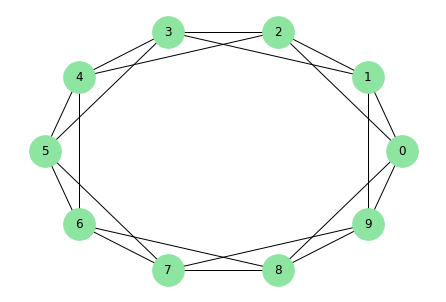

In [94]:
lattice = make_ring_lattice(10,4)
nx.draw_circular(lattice, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)

print(shortest_path_dijkstra_dfs(lattice, 0))
print(shortest_path_dijkstra(lattice, 0))

# Since the DFS version checks the nodes from the end of the list first, which are the nodes deeper 
# down the path, the first time that it sees many nodes is as part of a longer, more circuitous path.
# The distance doesn't get updated if that node is seen later as part of a shorter path.
